# Daniele Mellino - 2013373

In [1]:
library(tidyverse)
library(purrr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


# Exercise 1 - Six Boxes Toy Model : inference
Consider the six boxes toy model saw in the lecture. Labelling with $H_i  \: \text{for} \: i=0 ... 5$  the box containing $i$ number of white balls. Write an R programm that:

1. allows the user to insert the color of a ball randomly extracted(with replacement) from a pre-selected box;
2. prints on the standard output the probability of selecting each box;
3. plots the probability for each box as a function of the extraction step.

##### Note:
The next cell does not work properly in jupyter notebook, please:
paste it in a file ".r" and then inside the R console use : source("filename.r") 


Insert the color of the selected balls[W=white,B=black,q=stop]:
W

The posterior at iteration  1  is:
 0 0.06666667 0.1333333 0.2 0.2666667 0.3333333 
Insert the color of the selected balls[W=white,B=black,q=stop]:
W

The posterior at iteration  2  is:
 0 0.01818182 0.07272727 0.1636364 0.2909091 0.4545455 
Insert the color of the selected balls[W=white,B=black,q=stop]:
B


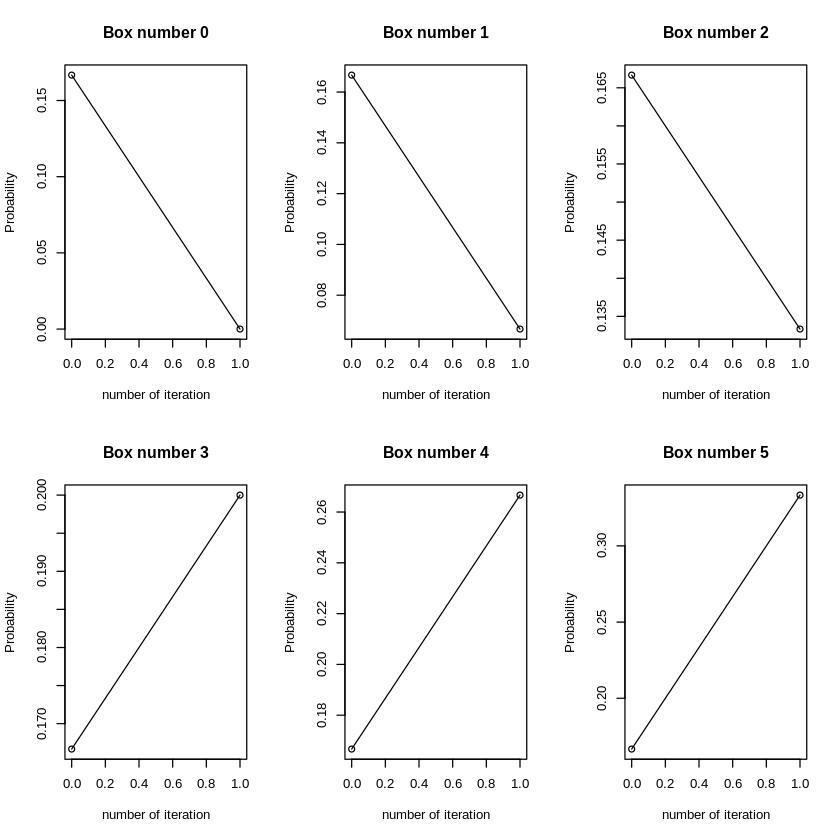


The posterior at iteration  3  is:
 0 0.08 0.24 0.36 0.32 0 
Insert the color of the selected balls[W=white,B=black,q=stop]:
q


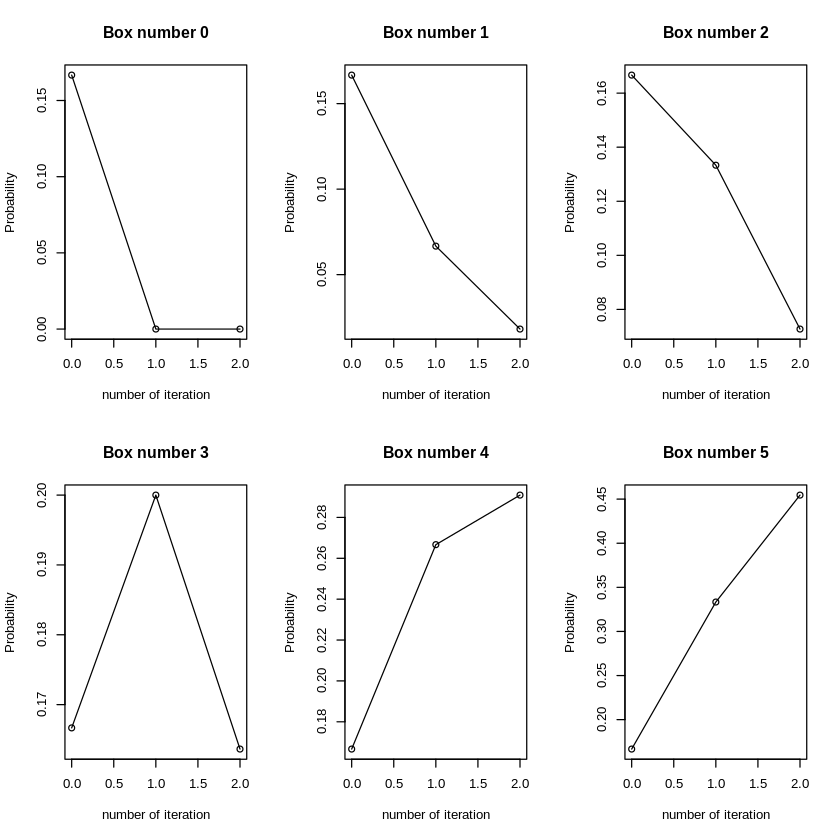

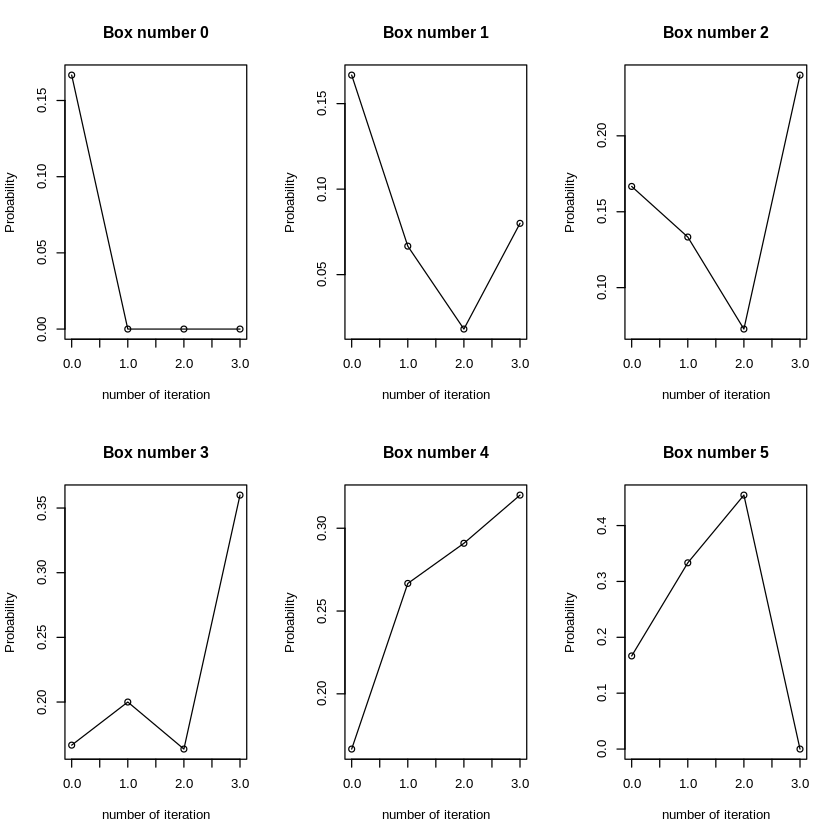

In [2]:

#define a function to manage the input procedure
Input_error = function(x) return(x=="W"|x=="B"|x=="q")

Read<-function(){
    ball_selected<-readline("Insert the color of the selected balls[W=white,B=black,q=stop]:\n")
    if (Input_error(ball_selected)==FALSE) stop("You need to select W or B ")
    return(ball_selected)
    
    }

#function that return the probabilities
Posterior_i =function(pwi,phj) return(pwi*phj/(sum(pwi*phj) ))



#initialise some variable
ball_selected<-"None"
        #number of boxes
BOXn=6
N=5     # number of balls in a box
i=0:N   #index of boxes

pwi_w=i/N              # probability to get white given a box
pwi_b=1-pwi_w          # probability to get black given a box

phj_old<-rep(1/BOXn,BOXn) # probability to pick a box, it will be updated
n=1#step

#initialise the dataframe in whick I'll store the probabilities
posterior_df<-c(i,"number") %>% map_dfc(setNames, object = list(logical()))

#add probabilities before the extraction
posterior_df<-posterior_df %>% rbind(c(phj_old,0))

#plotting set up
par(mfrow=c(2,3))

#options(repr.plot.width=8, repr.plot.height=6) #plot size, not use in R from shell


while (ball_selected!="q" ){
    
    ball_selected<-Read() # read W or B

    #store the probabilities
    if (ball_selected=="W") {
        posterior_df<-posterior_df %>% rbind(c(Posterior_i(pwi_w,phj_old),n))
        phj_old<-Posterior_i(pwi_w,phj_old) 

    }
    else if(ball_selected=="q") {next}
    
    else {
        posterior_df<-posterior_df %>% rbind(c(Posterior_i(pwi_b,phj_old),n))
        phj_old<-Posterior_i(pwi_b,phj_old) 

        }
        
    #print them for each iteration
    paste(cat("\nThe posterior at iteration ",n, " is:\n", phj_old,"\n" ) )
    
    #the procedure I use "rbind" change the name of the column, but I did not use them, in case one could use :
    #names(posterior_df)<-c(i,"extraction")
    
    #plot the probabilities for each step
    
    for (j in i) {
        plot(x=posterior_df[,7],y=posterior_df[,j+1], 
            main=sprintf("Box number %d",j),
            xlab="number of iteration",
            ylab="Probability")
        
        lines(x=posterior_df[,7],y=posterior_df[,j+1])
        
                }
    
    n=n+1
    }

# Exercise 2 - Six Boxes Toy Model : simulation

Consider the six boxes toy model saw in the lecture. Labelling with $H_i  \: \text{for} \: i=0 ... 5$  the box containing $i$ number of white balls.<br> Write an R programm that:

1. selects a random box
2. makes random sampling from the box
3. prints on the standard output the probability of selecting each box
4. plots the probability for each box as a function of the number of trial

Has been selected the box number:  0

character(0)

Has been simulated  100  samples. The probabilities for each box are:

character(0)

,0,1,2,3,4,5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
100,1,2.546295e-10,1.088864e-22,4.017345e-40,6.338253e-70,0


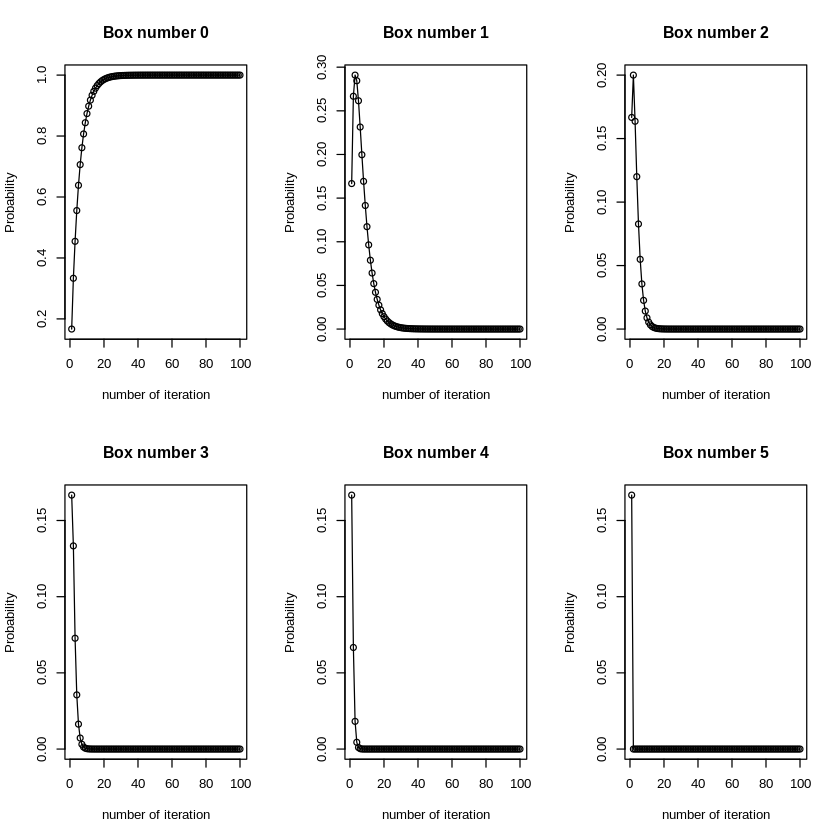

In [3]:
Posterior_i <-function(pwi,phj) return(pwi*phj/(sum(pwi*phj) ))
compute<-function(O,phj) {
    
    if (O==1) {
        l<-Posterior_i(pwi_w,phj)
    }    
    else {
        l<-Posterior_i(pwi_b,phj)
    }
    return(l)
}


dim=100   # number of samples to simulate
BOXn=6  #number of possible box
N=5     # number of balls in a box
i=0:N   #index of boxes

pwi_w=i/N              # probability to get white given a box
pwi_b=1-pwi_w          # probability to get black given a box

#select a random box:
Box_selected<-sample(0:(BOXn-1),1)

pwb_w=Box_selected/N              # probability to get white given the selected box
paste(cat("Has been selected the box number: ",Box_selected ) )


df<- data.frame(matrix(ncol=8,nrow=dim))
names(df)<-c(i,"outcome","number of trial")
df$"number of trial"<-1:dim  #add numbers of trial
df$"outcome"<-rbinom(n=dim,size=1, prob=pwb_w) #add outcome values
df[1,1:6]<-rep(1/BOXn,BOXn)  #add initial value


for (i in df[2:dim,]$"number of trial"){
    df[i:dim,1:BOXn]<-compute(df$"outcome"[i-1],df[(i-1),1:6])
}

paste(cat("Has been simulated ",dim ," samples. The probabilities for each box are:") )
df[i:dim,1:BOXn]

par(mfrow=c(2,3))
for (j in 1:BOXn){
    plot(x=df$"number of trial",y=df[,j], 
            main=sprintf("Box number %d",j-1),
            xlab="number of iteration",
            ylab="Probability")
        
    lines(x=df$"number of trial",y=df[,j])
   }     

# Exercise 3
Given a sequence of independent random variable $X_j \sim Gamma(\alpha_j,\beta)$, it follows that :

<br>
$ Y=\sum^n_{j=1}X_j \rightarrow Y \sim Gamma(\alpha,\beta) \;$ where $\; \alpha=\sum^n_{j=1} \alpha_j$
<br>

If $\alpha = m $ is an integer, a random variable from gamma distribution Gamma(m,$\beta$) (also known as Erlang distribution) can be obtained by summing m indipendent exponential random variables $X_j \sim Exp(\beta)$ <br>

$Y = \beta \sum^{n}_{j=1} - log(U_j) = -\beta log( \prod^n_{j=1} U_i)$
<br>

a) Write an algorithm to sample variables from an Erlang distribution Gamma(m,$\beta$)

In [4]:
#I implement the last formula
#to create U I build a matrix of uniform sample and then I use apply function to get the n products

rErlang<- function(n=1,m=1,beta=1){
    U<-matrix(runif(n*m),nrow=n,ncol=m)
    Y<- -log(apply(U,1,prod))*beta
    return(Y)
}

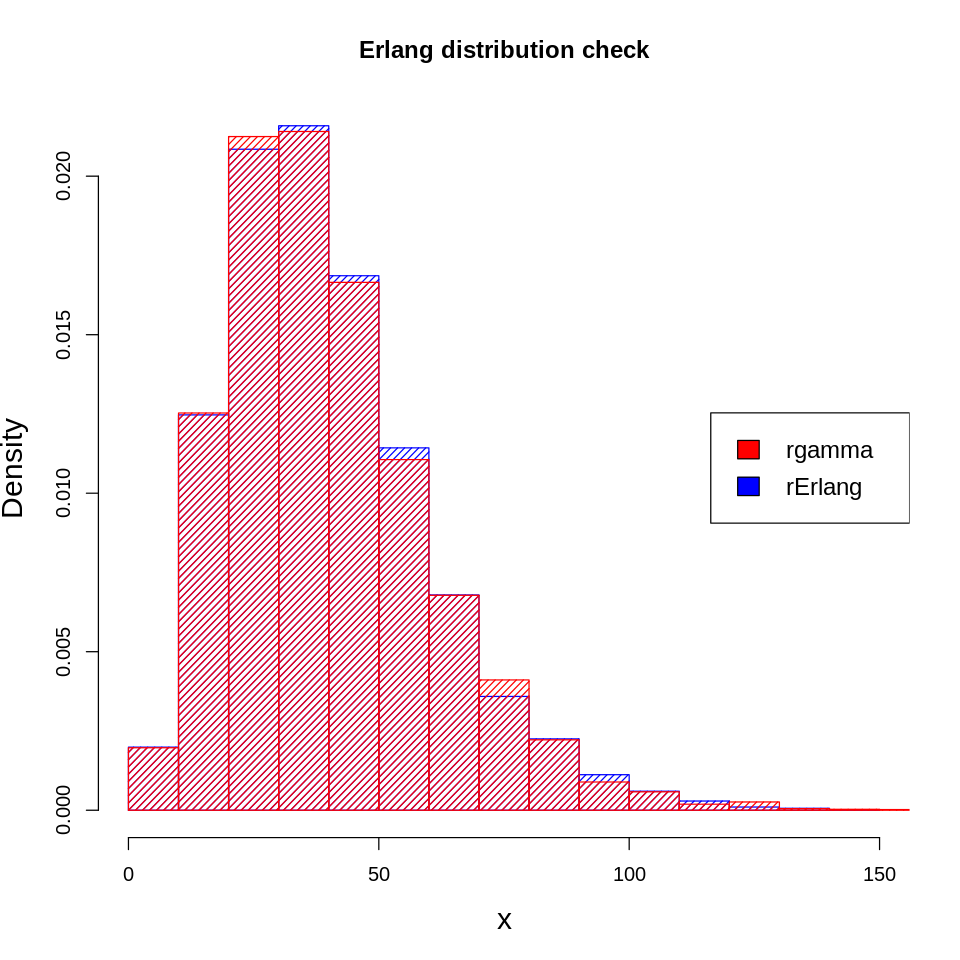

In [5]:
#Let's see if it works:
m=4
n=10000
beta=10


options(repr.plot.width=8, repr.plot.height=8)
#Erlang form:
x<-rErlang(n,m,beta)
Er_histo<-hist(x,
               xlab="x",
               cex.lab=1.5,
               main="Erlang distribution check",
               density=30,
               prob=TRUE,
              col='blue')
#analytic form : 
x2<-rgamma(n,scale=beta,shape=m)
hist(x2,
     xlab="x",
     cex.lab=1.5,
     main="Erlang distribution",
     density=30,
     prob=TRUE,
     col='red',
     add=TRUE)

legend("right",legend=c("rgamma","rErlang"),
        fill=c('red','blue'), cex=1.2)


# Exercise 4
One of the first random number generator was proposed by von Neumann, the so-called middle square algorithm.<br>
* Write R code to implement this type of generator and, given a fixed digit number input,square it and remove the leading and trailing digits, in order to return a number with thesame number of digits as the original number.


In [6]:
msgenerator<-function(N=1,x=123456){
    
    #container
    x_list<-NULL
    
    #compute the values to cut on the tail and on the head
    ndigit <- length(unlist(strsplit(as.character(x),"")))
    
    if(ndigit%%2 ==0){h.length<-ndigit/2
                     t.length<-ndigit/2}
    else{{h.length<-floor(ndigit/2)
                     floor(t.length<-ndigit/2) }
        
    }
    
    # generation
    for(i in 1:N){
        #square
        x2<-x^2
        x2<-unlist(strsplit(as.character(x2),""))
        #select
        x2 <- c(rep('0',ndigit*2 - length(x2)), x2)
        x          <- x2[(h.length+1):(ndigit*2-t.length)]
        x          <- as.numeric(paste(x, collapse=""))
        #check if the number is already present
        if(!(x %in% x_list )){
            x_list<-c(x_list,x)
        }
        else {
            print("Warning : insert a bigger seed")
        }
    }
    return(x_list)
    
}


msgenerator(10,54325924)

[1] 30601845 47291740 50867222 47427399 35817590 89975340 56180811 28352461
 [9] 86204475 21151002